# Galactic Ratotional Curves

A rotation curve is a plot showing how orbital velocity, V, varies with distance from the centre of the object, R. Rotation curves can be determined for any rotating object, and in astronomy are generally used to show how mass is distributed in the Solar System (Keplerian Rotation curves) or in spiral galaxies (galactic rotation curves). Our main focus here is the M31/NGC224/Andromeda Galaxy.

We will show what we would expect of the Galactic Rotation Curves, beginning with the Exp. disk model of Freeman (1970). The next step would be to compare the model to observational data and see why the dark matter problem arose.

## Theoretical Expectations

### DISKS OF SPIRAL AND SO GALAXIES - Freeman's Exp. disk 

We will now follow the steps to derive an analytic function that can be plotted.

We compute the rotation curve for the zero-thickness exponential disk in centrifugal equilibrium. Starting with expressing the surface density $\mu(R)$ as the Bessel integral
$$
\mu (R) = \int_{0} ^{\infty} J_0 (kR) k S(k)dk, 
$$
where
$$
S(k) = \int_{0}^{\infty} J_0 (kR) u_{\mu} (u) du.
$$
It then follows from Poisson's equation that the radial gradient of the gravitational potential $\Phi$ in the plane of the disk is
$$
- \left( \frac{d \Phi}{dR}\right)_{Z = 0} = 2 \pi G \int_{0}^{\infty} J_1 (Rk) k S(k)dk.
$$
From the centrifugal-equilibrium condition
$$
\frac{V^2 (R)}{R} = - \left( \frac{d \Phi}{dR}\right)_{Z = 0},
$$
where $V(R)$ is the circular velocity at radius R, it follows that
$$
\begin{split}
    \frac{V^2 (R)}{R} &= 2 \pi G \int_{0}^{\infty} J_1 (Rk) k \int_{0}^{\infty} J_0 (kR) u_{\mu} (u) du dk
    \\
                   &= 2 \pi G \mu_0 \int_{0}^{\infty} J_1 (Rk) k \int_{0}^{\infty} u \exp{- \alpha u} J_0 (ku) du dk
\end{split}
$$
for the exponential disk, where G is the gravitational constant.

It is possible to show that
$$
\frac{V^2 (R)}{R} = \pi G \mu_0 \alpha R (I_0 K_0 - I_1 K_1), 
$$
where I and K are modiffied Bessel functions and are evaluated at $\alpha R/2$.

We first write the Rotation Curve in dimensionless form: let $\bar{R} = \alpha R$ and $\bar{V} = V/\sqrt{(G \mathcal{M} \alpha)}$. The total mass of the exponential disk is
$$
\mathcal{M} = \frac{2 \pi \mu_0}{\alpha^2}
$$

In [13]:
import numpy as np
from scipy.special import k0, k1, i0, i1
import matplotlib.pyplot as plt

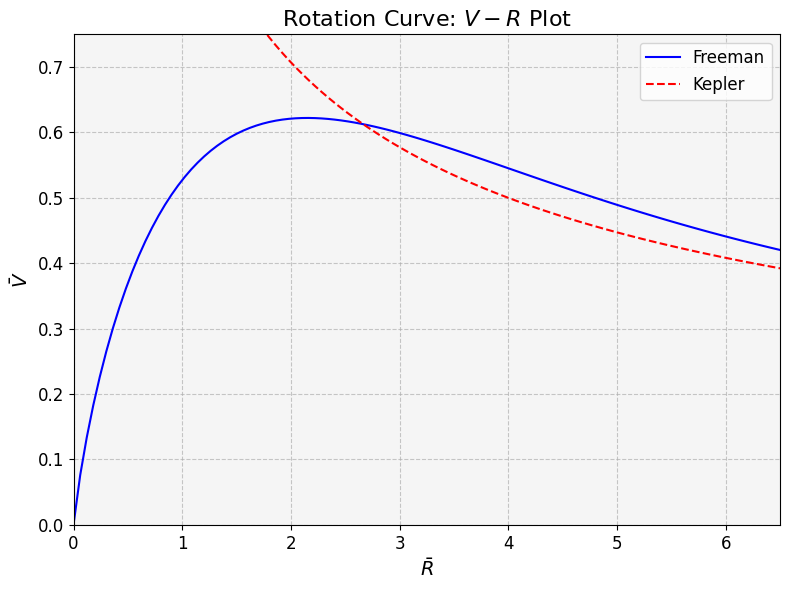

In [14]:
# First we calculate in dimensionless units
R_bar = np.linspace(0.001, 600, 10000) 
Vrot_f_dim =  np.sqrt((R_bar**2 / 2) * (i0(0.5 * R_bar) * k0(0.5 * R_bar) - i1(0.5 * R_bar) * k1(0.5 * R_bar))) #Freeman (1970)
Vrot_k_dim =  np.sqrt(1/R_bar)

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

# Plot data
ax.plot(R_bar, Vrot_f_dim, label='Freeman', linestyle='-', color='b')
ax.plot(R_bar, Vrot_k_dim, label='Kepler', linestyle='--', color='r')

# Labels and title
ax.set_xlabel('$\\bar{R}$', fontsize=14)
ax.set_ylabel('$\\bar{V}$', fontsize=14)
ax.set_xlim(0, 6.5)
ax.set_ylim(0, 0.75)
ax.set_title('Rotation Curve: $V - R$ Plot', fontsize=16)

# Grid lines
ax.grid(True, linestyle='--', alpha=0.7)

# Legend
ax.legend(fontsize=12)

# Tick parameters
ax.tick_params(axis='both', which='both', labelsize=12)

# Add a scientific notation for y-axis if necessary
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

# Customize the plot background
ax.set_facecolor('whitesmoke')

# Add a grid line at y=0 if needed
# ax.axhline(y=0, color='black', linestyle='--', linewidth=0.8)

# Save or display the plot
plt.tight_layout()
plt.show()


The rotation curve of the model is compared to the dimensionless Keplerian curve, like Freeman did in his paper. The two figures, the one we made and Freeman's seem to be identical. Now we will try to recreate Figure 4 of the paper 'History of dark matter'. I got the values of $\alpha$ and distance $\mathcal{D}$ of M31, Freeman had, but can't find the exact total mass he made the calculations with. So I consider a mass of $2.4\times 10^{11} M_{\odot}$.

In [15]:
# Constants
G = 4.302e-6  # Gravitational constant in (km/s)^2 * kpc * M_sun^(-1)
distance_to_M31_kpc = 690.0  # Assumed distance to M31 - Freeman (1970)
alpha = 1/4.5 #kpc-1 - Freeman (1970)
mass_M31 = 2.4e11  #Virial mass of M31 in M_sun Vaucouleurs (1958)
#Unit convert
dimensionless_to_Mo_kpc = 1/np.sqrt(G*mass_M31*alpha)

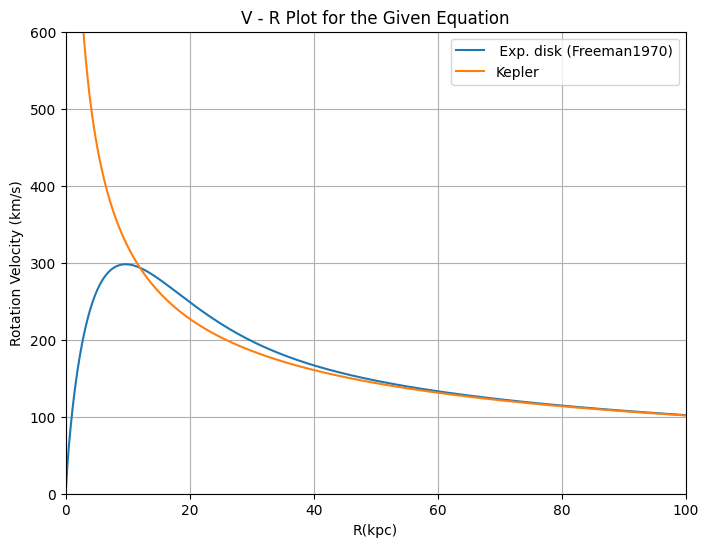

In [16]:
# Now we calculate in dimensions. km/s for V and kpc for Radius
Vrot_freeman = Vrot_f_dim/dimensionless_to_Mo_kpc
Vrot_kepler = Vrot_k_dim/dimensionless_to_Mo_kpc
R_kpc = R_bar/alpha

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(R_kpc, Vrot_freeman, label=' Exp. disk (Freeman1970)')
plt.plot(R_kpc,Vrot_kepler, label='Kepler')
plt.xlabel('R(kpc)')
plt.xlim(0,100)
plt.ylabel('Rotation Velocity (km/s)')
plt.ylim(0,600)
plt.title('V - R Plot for the Given Equation')
plt.grid(True)
plt.legend()
plt.show()


We transform now the Radius, from kpc's to arcminsm, and plot again

In [17]:
def kpc_to_arcmin(radius_kpc, distance_kpc=780):
    constant = 206265 / 60  # Constant for conversion from arcseconds to arcminutes
    radius_arcmin = [round((r / distance_kpc) * constant, 1) for r in radius_kpc]
    return radius_arcmin

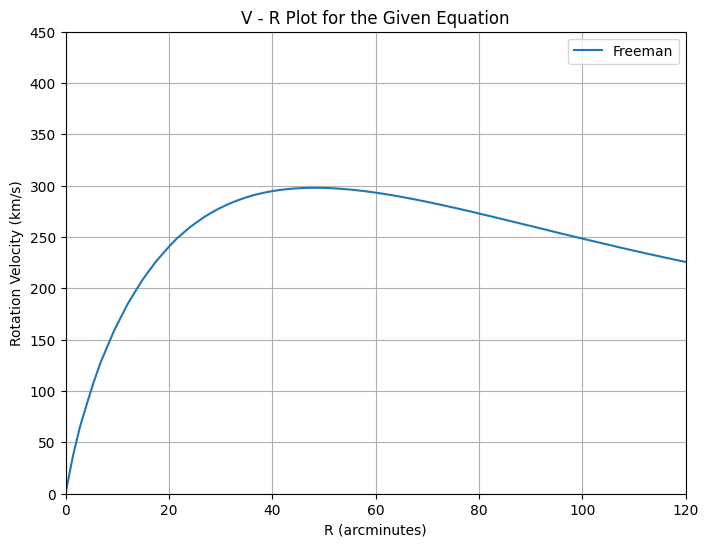

In [18]:
# Calculate the conversion factor
R_arcmin =  kpc_to_arcmin(R_kpc, distance_kpc=distance_to_M31_kpc)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(R_arcmin, Vrot_freeman, label='Freeman')
plt.xlabel('R (arcminutes)')
plt.ylabel('Rotation Velocity (km/s)')
plt.ylim(0, 450)
plt.xlim(0, 120)
plt.title('V - R Plot for the Given Equation')
plt.grid(True)
plt.legend()
plt.show()


## Rotation Curve Data for M31

We will now plot the data from various papers, and then compare it with the model.

### Babcock (1939)

In [19]:
#Babcock (1939) data
Babcock_Radius_arcmin = [70.0, 68.5, 96.5, 32.1]
Babcock_Vrot_kms = [271, 290, 375, 203]

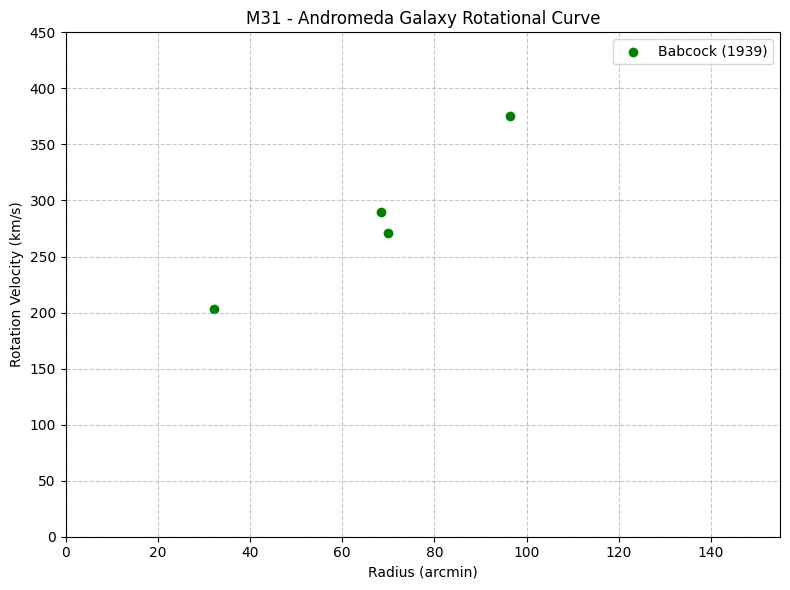

In [20]:
plt.figure(figsize=(8, 6))
plt.title('M31 - Andromeda Galaxy Rotational Curve')
plt.scatter(Babcock_Radius_arcmin,Babcock_Vrot_kms, color='green', label='Babcock (1939)')
plt.ylim(0,450)
plt.ylabel('Rotation Velocity (km/s)')
plt.xlim(0,155)
plt.xlabel('Radius (arcmin)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
# Show the plot
plt.tight_layout()
plt.show()

### Rubin & Ford (1970)

In [21]:
#Rubin (1970)
Rubin_arcmin = [16.2, 23.0, 24.0, 24.7, 25.2, 51.4, 51.4, 51.6, 52.1, 52.1,52.2, 52.5, 52.5, 53.7, 54.1, 56.8, 56.9, 64.3, 64.6, 75.7, 93.4, 100.5, 22.1, 22.1, 22.6, 47.4, 47.5, 50.4, 52.8, 64.3, 66.8, 69.9, 70.2, 79.4, 91.0, 91.3, 92.2, 120.1, 32.2, 34.2, 38.5, 43.2, 52.8, 53.9, 54.9, 56.2, 57.0, 60.9, 65.5, 67.3, 71.0, 71.5, 73.3, 111.6, 18.6, 18.6, 25.4, 25.5, 41.3, 41.5, 64.4, 66.8, 67.0, 95.9, 102.7, 102.9, 113.6]
Rubin_vrot_kms = [66, 278, 250, 273, 290, 237, 242, 247, 275, 284, 270, 264, 321, 341, 309, 275, 232, 280, 303, 208, 215, 198, 240, 96, 433, 248, 285, 267, 265, 340, 221, 258, 273, 224, 202, 224, 206, 267, 318, 270, 215, 277, 218, 172, 265, 248, 238, 266, 282, 252, 278, 253, 232, 212, 121, 185, 276, 221, 247, 262, 235, 224, 256, 203, 282, 214, 219] 
Rubin_vrot_kms_err = [ 11, 52, 52, 23, 24, 24, 24, 24, 11, 16, 10, 16, 24, 68, 27, 21, 14, 12, 31, 12, 10, 10, 39, 39, 30, 18, 29, 11, 23, 25, 13, 10, 10, 20, 12, 11, 11, 10, 22, 12, 10, 10, 23, 19, 17, 13, 10, 11, 21, 10, 11, 11, 18, 12, 20, 34, 26, 15, 10, 30, 10, 12, 12, 10, 13, 13, 10]

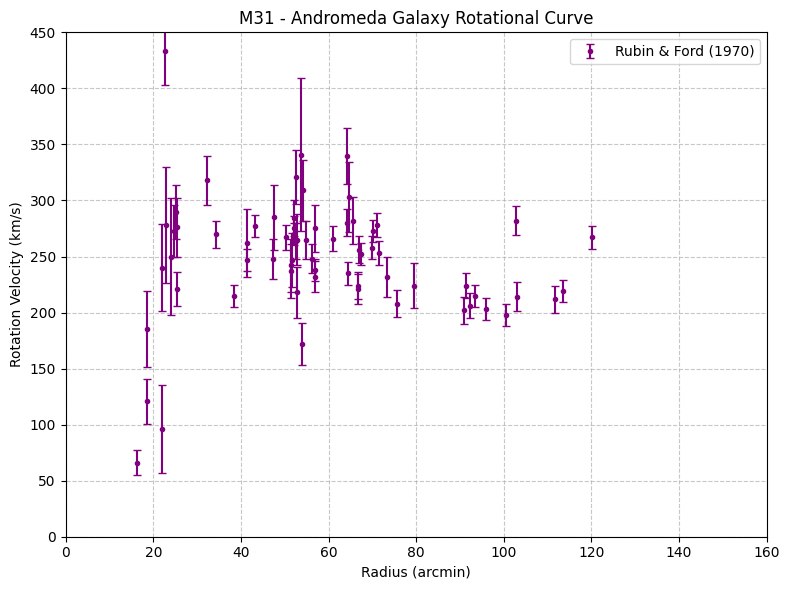

In [22]:
plt.figure(figsize=(8, 6))
plt.title('M31 - Andromeda Galaxy Rotational Curve')
plt.errorbar(Rubin_arcmin,Rubin_vrot_kms, yerr = Rubin_vrot_kms_err, fmt='o', markersize=3, capsize=3, color='purple', label='Rubin & Ford (1970)')
plt.ylim(0,450)
plt.ylabel('Rotation Velocity (km/s)')
plt.xlim(0,160)
plt.xlabel('Radius (arcmin)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
# Show the plot
plt.tight_layout()
plt.show()

### Roberts & Whitehurst 1975

In [23]:
# Roberts & Whitehurst 1975 data
Roberts_Radius_arcmin = [150.4, 150.8, 145.4, 146.0, 140.7, 140.4, 140.4, 140.6, 141.0, 141.5, 135.4, 130.8, 130.4, 130.5, 130.9, 131.5, 127.5, 120.3, 122.7, 123.8, 116.9, 110.3, 113.3, 114.4, 105.3]
Roberts_V_rot_kms =     [232.0, 237, 230, 234, 229, 228, 230, 230, 231, 233, 225, 226, 222, 223, 223, 227, 215, 225, 222, 238, 214, 230, 205,222, 226]
Roberts_V_rot_kms_err = [7, 5, 5, 5, 5, 5, 3, 5, 7, 7, 5, 6, 6, 5,5, 7, 7, 5, 13, 7, 6, 5, 11, 17, 5]

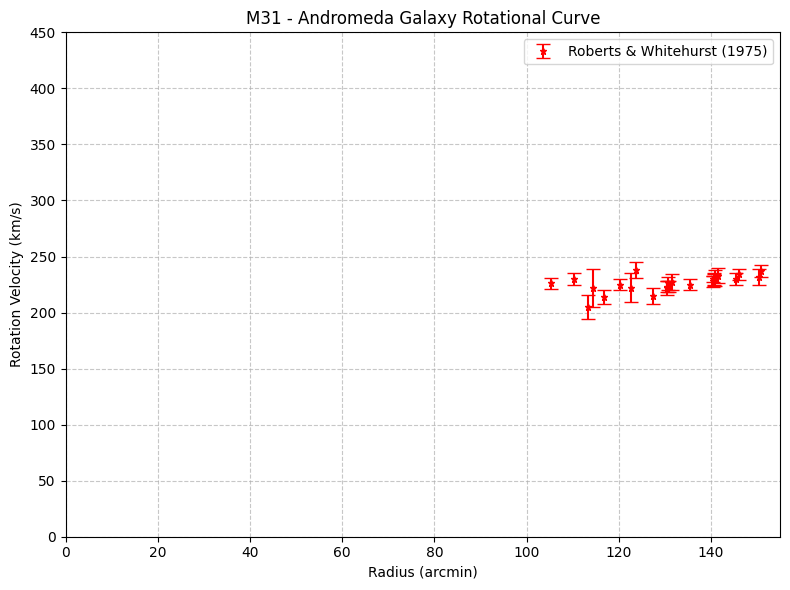

In [24]:
plt.figure(figsize=(8, 6))
plt.title('M31 - Andromeda Galaxy Rotational Curve')
plt.errorbar(Roberts_Radius_arcmin,Roberts_V_rot_kms, yerr = Roberts_V_rot_kms_err, fmt='*', markersize=5, capsize=5, color='red', label='Roberts & Whitehurst (1975)')
plt.ylim(0,450)
plt.ylabel('Rotation Velocity (km/s)')
plt.xlim(0,155)
plt.xlabel('Radius (arcmin)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
# Show the plot
plt.tight_layout()
plt.show()

### Carignan 2006

In [25]:
# Carignan 2006 data
Car_Radius_arcmin = [25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 94.5, 99.0, 103.5, 108.0, 112.5, 117.0, 121.5, 126.0, 130.5, 135.0, 139.5, 144.0, 148.5, 153.0]
Car_Radius_kpc = [5.68, 6.81, 7.95, 9.08, 10.22, 11.35, 12.49, 13.62, 14.76, 15.89, 17.03, 18.16, 19.30, 20.43, 21.45, 22.47, 23.50, 24.52, 25.54, 26.56, 27.58, 28.60, 29.62, 30.65, 31.67, 32.69, 33.71, 34.73]
Car_vrot = [235.5, 242.9, 251.1, 262.0, 258.9, 255.1, 251.8, 252.1, 251.0, 245.5, 232.8, 232.0, 235.7, 229.3, 227.6, 226.0, 225.7, 227.5, 227.4, 225.6, 224.4, 222.3, 222.1, 224.9, 228.1, 231.1, 230.4, 226.8]
Car_vrot_err = [17.8, 0.8, 0.7, 2.1, 6.9, 5.7, 17.1, 7.4, 18.6, 28.8, 1.0, 14.2, 4.6, 13.8, 28.8, 28.8, 28.8, 28.8, 28.8, 28.8, 28.8, 28.8, 28.8, 28.8, 28.8, 28.8, 28.8, 28.8]

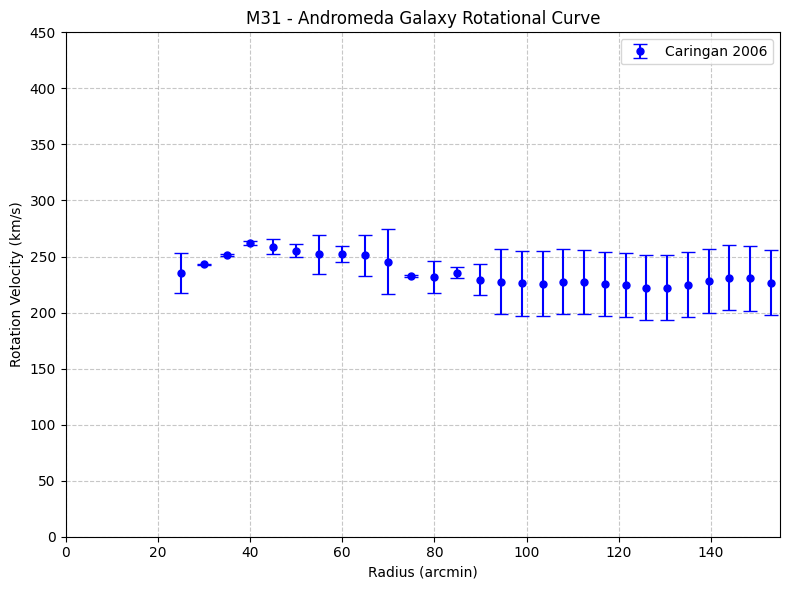

In [26]:
plt.figure(figsize=(8, 6))
plt.title('M31 - Andromeda Galaxy Rotational Curve')
plt.errorbar(Car_Radius_arcmin,Car_vrot, yerr = Car_vrot_err, fmt='o', markersize=5, capsize=5, color='blue', label='Caringan 2006')
plt.ylim(0,450)
plt.ylabel('Rotation Velocity (km/s)')
plt.xlim(0,155)
plt.xlabel('Radius (arcmin)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
# Show the plot
plt.tight_layout()
plt.show()

## Model vs Data

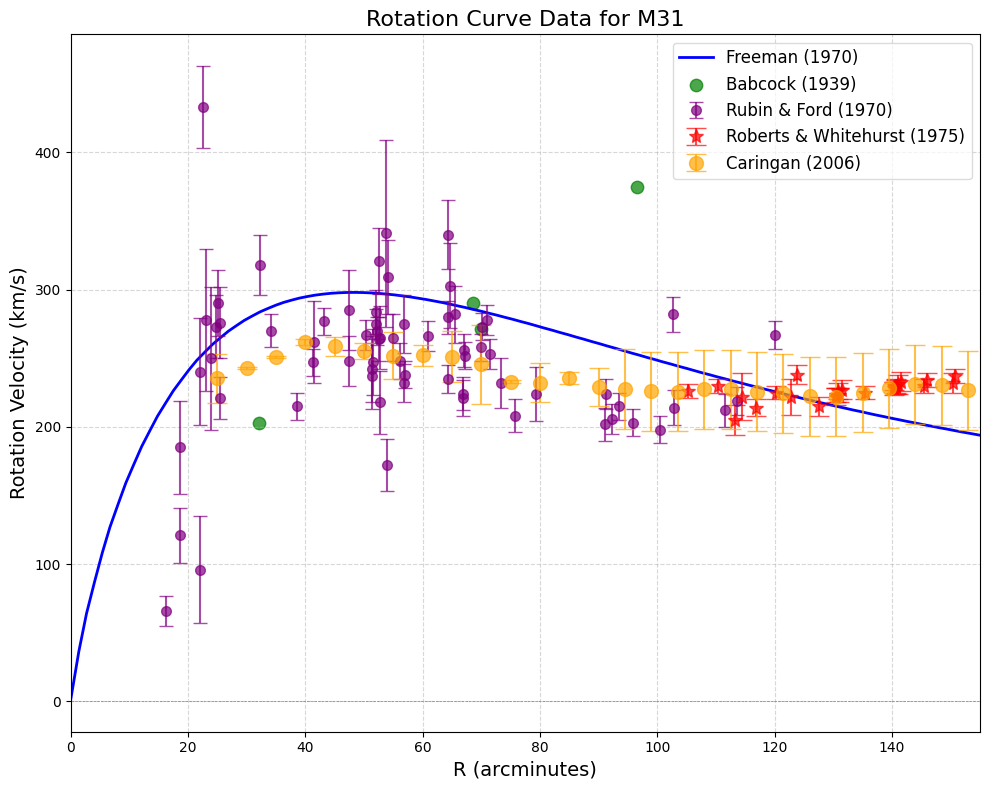

In [39]:
# Create the plot
plt.figure(figsize=(10, 8))

# Data plots
plt.plot(R_arcmin, Vrot_freeman, label='Freeman (1970)', linewidth=2, linestyle='-', color='blue')
plt.scatter(Babcock_Radius_arcmin, Babcock_Vrot_kms, color='green', label='Babcock (1939)', marker='o', s=80, alpha=0.7)
plt.errorbar(Rubin_arcmin, Rubin_vrot_kms, yerr=Rubin_vrot_kms_err, fmt='o', markersize=7, capsize=5, color='purple', label='Rubin & Ford (1970)', alpha=0.7)
plt.errorbar(Roberts_Radius_arcmin, Roberts_V_rot_kms, yerr=Roberts_V_rot_kms_err, fmt='*', markersize=10, capsize=7, color='red', label='Roberts & Whitehurst (1975)', alpha=0.7)
plt.errorbar(Car_Radius_arcmin, Car_vrot, yerr=Car_vrot_err, fmt='o', markersize=10, capsize=7, color='orange', label='Caringan (2006)', alpha=0.7)

# Customize the plot
plt.xlim(0, 155)
plt.grid(True, linestyle='--', alpha=0.5)
plt.title('Rotation Curve Data for M31', fontsize=16)
plt.xlabel('R (arcminutes)', fontsize=14)
plt.ylabel('Rotation Velocity (km/s)', fontsize=14)

# Legend with a shadow and custom font size
legend = plt.legend(fontsize=12, loc='upper right')
legend.get_frame().set_alpha(0.7)

# Add a horizontal line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

# Add a text annotation
#plt.annotate('Zero Velocity', xy=(20, 10), fontsize=12, color='gray')

# Save the plot as an image (optional)
# plt.savefig('rotation_curve_m31.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()

## Bibliography

1. https.//astronomy.swin.edu.au/cosmos/r/rotation+curve
2. Freeman (1970), https.//ui.adsabs.harvard.edu/abs/1970ApJ...160..811F/abstract
3. Roberts & Whitehurst (1975), https.//ui.adsabs.harvard.edu/abs/1975ApJ...201..327R/abstract
4. Babcock (1939), https.//ui.adsabs.harvard.edu/abs/1939LicOB..19...41B/abstract
5. Rubin & Ford (1970), https://ui.adsabs.harvard.edu/abs/1970ApJ...159..379R/abstract
6. Carignan (2006), https://iopscience.iop.org/article/10.1086/503869
7. de Vaucouleurs (1958), https://ui.adsabs.harvard.edu/abs/1958ApJ...128..465D/abstract